# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [19]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations (rows)

#### Question 2. Create a summary table

In [20]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Standard deviation (STD) is used to quantify the amount dispersion in a data set.  In this data set, GRE scores range from 220 - 800, while GPA ranges from 2.26 - 4.00.  This large discrepancy in range explains why GRE has a larger STD than GPA, and why one cannot compare the two.

#### Question 4. Drop data points with missing data


In [21]:
print df_raw['admit'].isnull().sum()
print df_raw['gre'].isnull().sum()
print df_raw['gpa'].isnull().sum()
print df_raw['prestige'].isnull().sum()
df_ucla = df_raw.dropna()
df_ucla.count()

0
2
2
1


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [22]:
df_ucla.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: One can see that there are now only 397 observations after dropping the missing data. In addition, the mean, std, and median all changed as a result and this confirms that the missing data was dropped.

#### Question 6. Create box plots for GRE and GPA

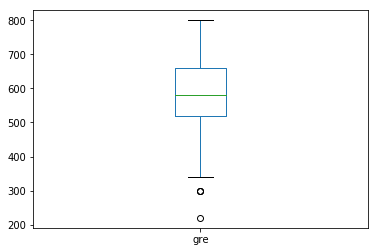

In [24]:
#boxplot 1
df_ucla['gre'].plot(kind='box')

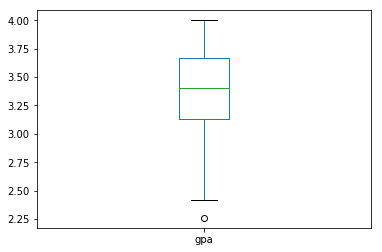

In [25]:
#boxplot 2 
df_ucla['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The box plots show the minimum, maximum, median, and IQR for GRE & GPA.

#### Question 8. Describe each distribution 

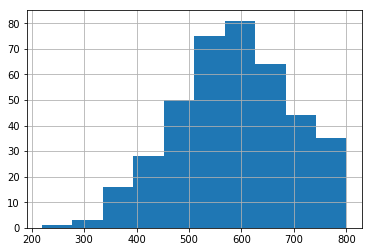

In [38]:
# plot the distribution of each variable 
# GRE distribution
df_ucla['gre'].hist()

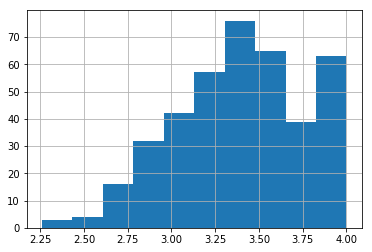

In [48]:
# GPA distribution
df_ucla['gpa'].hist()

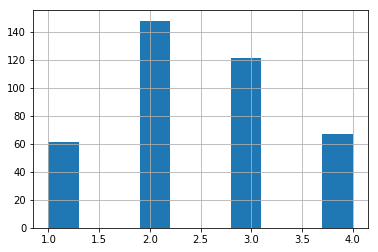

In [40]:
# Pretige distribution
df_ucla['prestige'].hist()

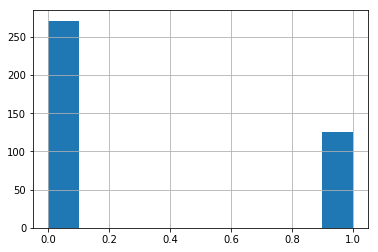

In [41]:
# Admit distribution
df_ucla['admit'].hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, a normal distribution for GRE and GPA can be assumed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: There appears to be a slight negative skew of GRE & GPA distributions. The prestige distribution will need correction since it is a categorical variable.

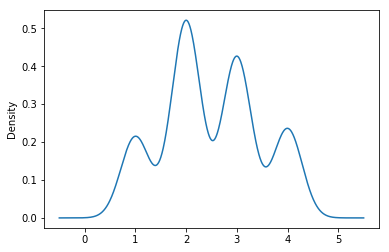

In [45]:
df_ucla['prestige'].plot(kind='density')

#### Question 11. Which of our variables are potentially colinear? 

In [26]:
# create a correlation matrix for the data
df_ucla.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The categorical "prestige" variable can have colineararity after dummifying it. A baseline prestige therefore needs to be identified to prevent colineararity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  One will run a logistic regression using numpy & pandas to explore the association between admission into the graduate school and prestige of undergraduate school from perspective applicants.  Since prestige is a categorical variable, the get_dummmies method will be used in pandas for assigning rank of the undergraduate school. Statsmodels will then be used to run a regression.

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis -- there is no association between the prestige of undergraduate schools and UCLA graduate school admission.
Alternative Hypothesis -- there is an association between the prestige of undergraduate schools and UCLA graduate school admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data